In [1]:
from scipy.stats import expon
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
import dill
from astropy import visualization as vis
from gammapy.data import DataStore, Observation
import scanner_interpretation as scani

with open("pkl_jugs/reduced_with_significance.pkl","rb") as f:
    reduced = dill.load(f)

In [32]:
reduced[0]["ID"]

array([266287973031, 266287973414, 266287973566])

Text(0, 0.5, 'Counts')

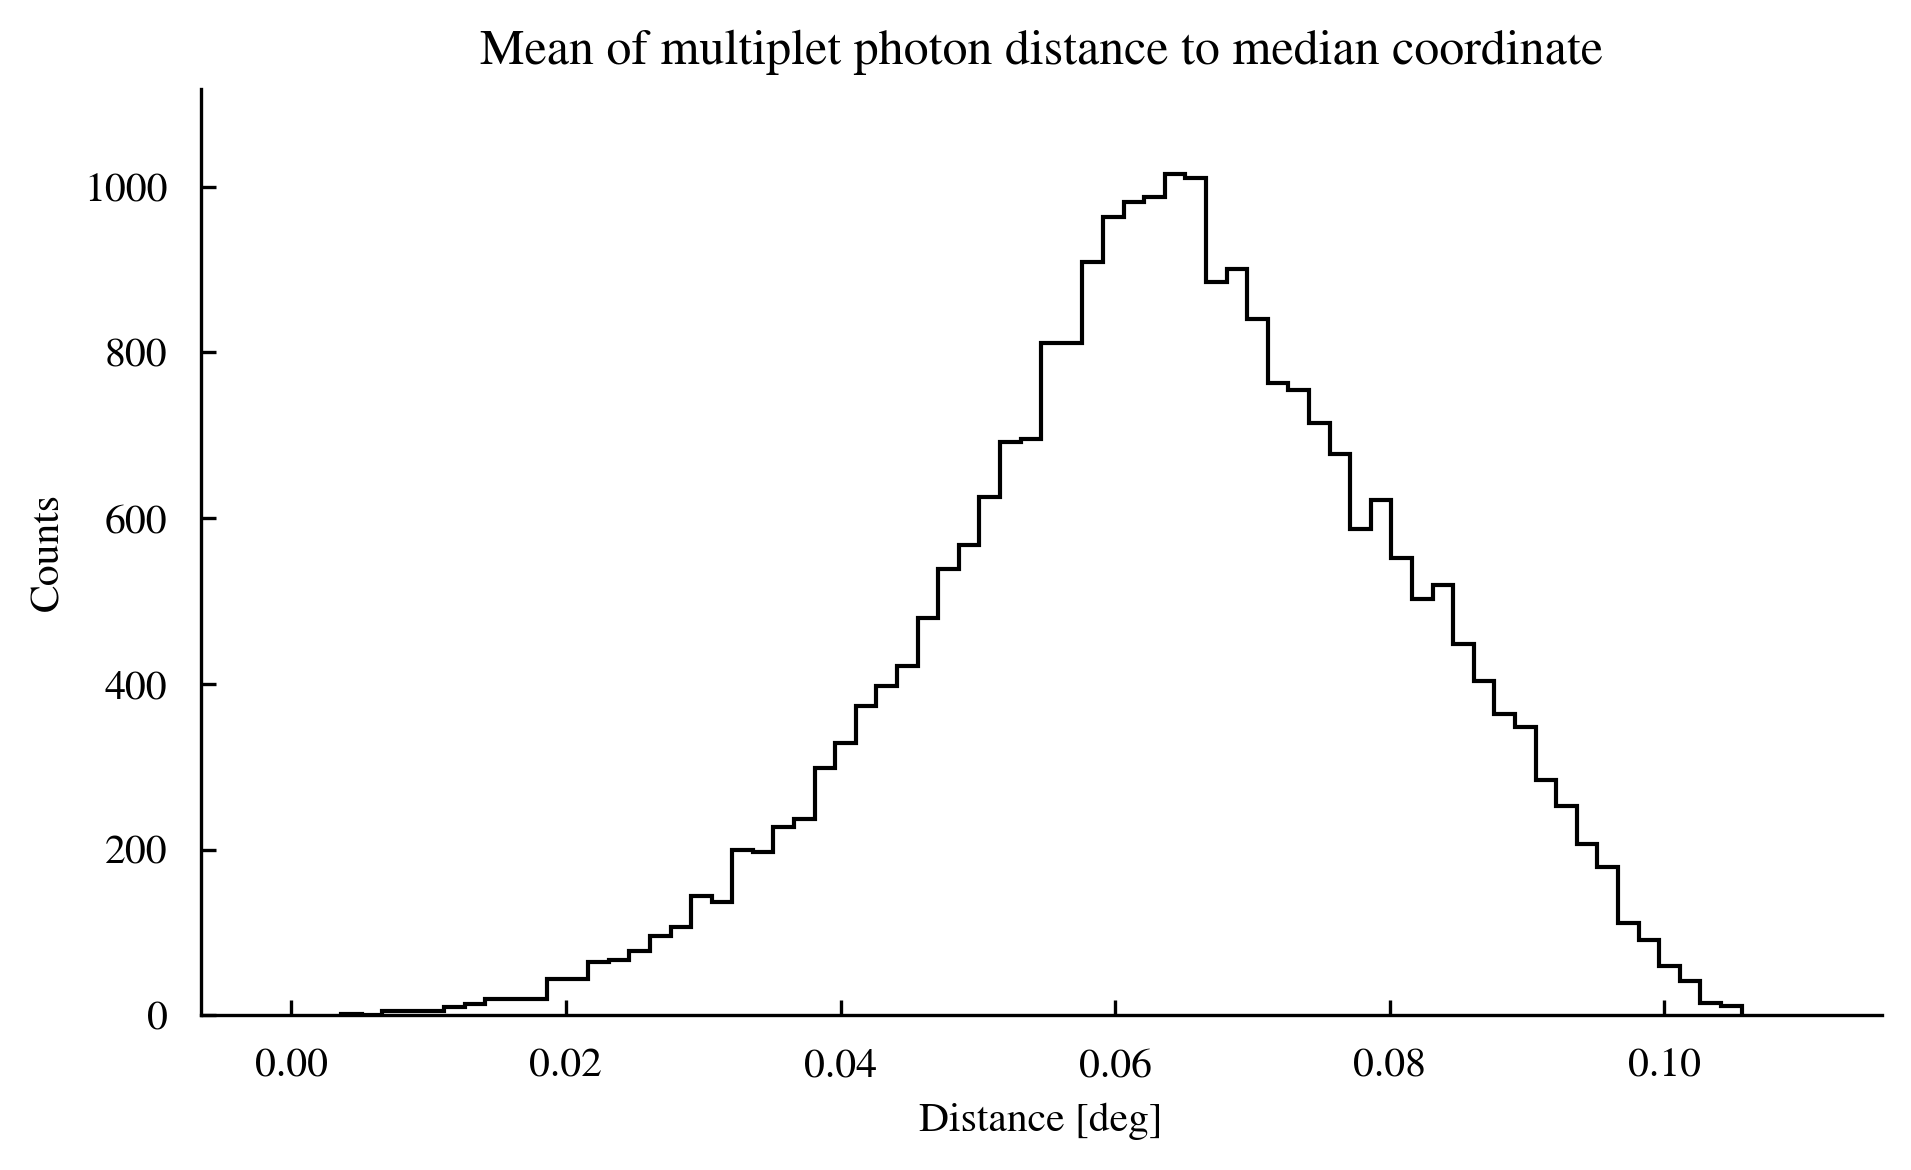

In [28]:
h = vis.hist(reduced["ANGULAR_MEASURE_DEG"],histtype="step",bins="freedman")
plt.title("Mean of multiplet photon distance to median coordinate")
plt.xlabel("Distance [deg]")
plt.ylabel("Counts")

In [3]:
min(reduced["LAMBDA_RATIO_SIGNIFICANCE"]),max(reduced["LAMBDA_RATIO_SIGNIFICANCE"])

(8.411049634560186e-13, 0.9999999869029461)

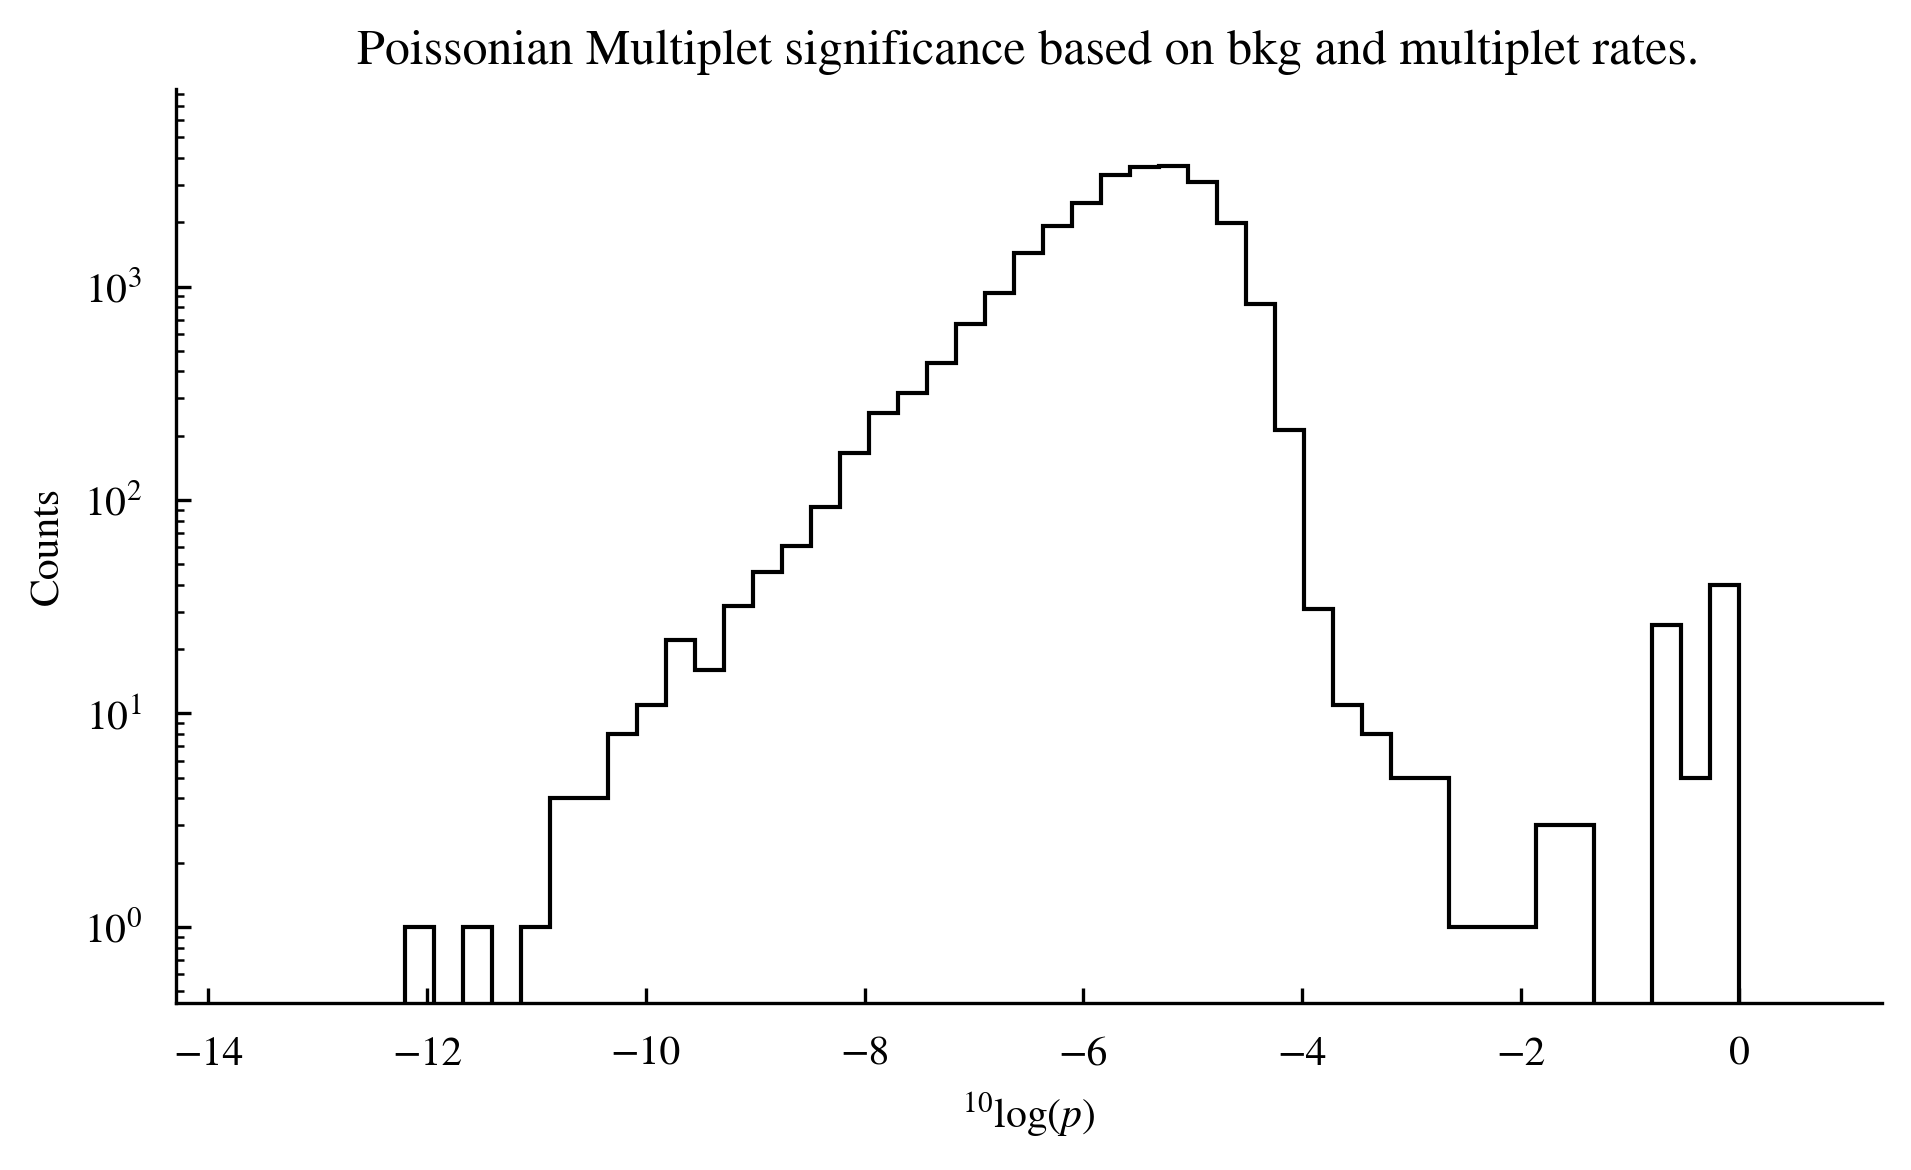

In [21]:
h = vis.hist(np.log10(reduced["LAMBDA_RATIO_SIGNIFICANCE"]),histtype="step",bins=np.linspace(-13,0))
plt.yscale("log")
plt.xlabel(r"$^{10}\log(p)$")
plt.ylabel("Counts")
plt.title("Poissonian Multiplet significance based on bkg and multiplet rates.")
plt.savefig("figures/combined/lambda_ratio_significance.pdf")
plt.savefig("figures/combined/lambda_ratio_significance.png",facecolor="white")
# h = vis.hist(reduced["MPLET_DT_LAMBDA"],histtype="step",bins=np.linspace(6e-19,9.5e-19,100))

In [41]:
# h = vis.hist(reduced["dt"][reduced["LAMBDA_RATIO_SIGNIFICANCE"] < 1e-5],histtype="step",bins="freedman")
reduced[(reduced["LAMBDA_RATIO_SIGNIFICANCE"] < 1e-7)*(reduced["dt"] > 27e8)]

Nmax,OBS_ID,ID,RA,DEC,TIME,ENERGY,dt,da,MEDIAN_RA,MEDIAN_DEC,SkyCoord,MEDIAN_GLAT,MEDIAN_GLON,TEVCAT_SOURCE_NAME,TEVCAT_SOURCE_TYPE,TEVCAT_DISTANCES_DEG,DS_INDEX,ANGULAR_MEASURE_DEG,BKG_DT_LAMBDA,MPLET_DT_LAMBDA,LAMBDA_RATIO_SIGNIFICANCE
,,,,,,,,,,,"deg,deg",deg,deg,,,,,,,,
int64,uint32,object,object,object,object,object,float64,float64,float64,float64,SkyCoord,float64,float64,str21,str22,float64,int64,float64,float64,float64,float64
3,21045,[283467842219 287762808976 287762809285],[167.96089 167.83093 168.01326],[-22.298223 -22.291811 -22.279663],['2004-06-06T17:40:07.385296399' '2004-06-06T17:40:08.765027339'\n '2004-06-06T17:40:10.310325438'],[0.99996305 0.2832152 0.36620834],2925028992.0,0.18273151104523405,167.9608917236328,-22.291810989379883,"167.9608917236328,-22.291810989379883",35.027534420268964,274.52625510241603,1ES 1101-232,HBL,2.3850286775438736,0,0.05887099446560163,0.0012567201810136759,6.837538955455135e-10,2.782486641095261e-08
4,21068,[3225520439994 3225520440122 3225520440385 3229815406853],[166.31061 166.43062 166.35944 166.50533],[-23.883945 -23.830513 -23.84746 -23.920687],['2004-06-08T18:36:11.626234109' '2004-06-08T18:36:11.858798081'\n '2004-06-08T18:36:12.637182528' '2004-06-08T18:36:14.403936679'],[0.31103775 0.35166645 0.4708292 0.24030727],2777702528.0,0.1981534471614089,166.39501953125,-23.865703582763672,"166.39501953125,-23.865703582763672",32.96424328812883,273.8711332879687,1ES 1101-232,HBL,0.6162711226645268,0,0.06985794802087474,0.010139015971797498,1.0800292415757098e-09,8.039546683935583e-08
4,21399,[22801981375219 22801981375299 22806276342018 22806276342205],[301.9459 302.11423 302.06912 302.1257 ],[-48.100292 -48.189373 -48.098827 -48.08937 ],['2004-06-23T03:01:52.470455224' '2004-06-23T03:01:52.783520991'\n '2004-06-23T03:01:54.706981951' '2004-06-23T03:01:55.470205123'],[0.520134 1.086194 3.259826 0.41599932],2999750016.0,0.1934030768732437,302.0916748046875,-48.09955978393555,"302.0916748046875,-48.09955978393555",-32.35577123344144,351.21673617059963,PKS 2005-489,HBL,0.7800728367968991,0,0.05709886569520396,0.008099145661851463,1.0000833739506362e-09,4.470869918726805e-08
4,23636,[6236292514441 6240587481091 6240587481270 6240587481429],[66.80974 66.64142 66.72144 66.796265],[4.5650954 4.575189 4.6170306 4.474347 ],['2004-12-13T21:23:59.060057456' '2004-12-13T21:24:00.824921424'\n '2004-12-13T21:24:01.428878838' '2004-12-13T21:24:01.932847792'],[0.22992003 0.523438 0.4410592 0.4861409 ],2872790272.0,0.18549722000431756,66.75885009765625,4.5701422691345215,"66.75885009765625,4.5701422691345215",-29.103308785358372,190.1220917932748,1ES 0414+009,HBL,4.308216176946696,0,0.08271221510171577,0.008120646138119383,1.0442808729916308e-09,3.8046991890361426e-08
4,24434,[16617228469158 16617228469447 16617228469564 16621523436094],[166.6149 166.5992 166.67421 166.59995],[-23.715015 -23.711824 -23.636778 -23.6829 ],['2005-03-06T23:41:06.998923117' '2005-03-06T23:41:07.841928059'\n '2005-03-06T23:41:08.177708203' '2005-03-06T23:41:09.932314450'],[0.14044768 0.31451282 0.19325806 0.24823342],2933391360.0,0.10610755988902143,166.607421875,-23.69736099243164,"166.607421875,-23.69736099243164",33.20435335858894,273.98094201594466,1ES 1101-232,HBL,0.7335638048200703,0,0.03433411284073056,0.009273845046327238,1.0227070511358875e-09,7.005975244389617e-08
4,24488,[1241245548717 1241245549004 1241245549258 1241245549377],[186.50092 186.62671 186.57613 186.47395],[10.456182 10.491596 10.571402 10.546236],['2005-03-10T01:55:30.515423829' '2005-03-10T01:55:31.755491549'\n '2005-03-10T01:55:32.803526456' '2005-03-10T01:55:33.257266337'],[0.7490201 0.46406612 0.44215503 3.28498 ],2741842432.0,0.16223385837447005,186.53851318359375,10.518916130065918,"186.53851318359375,10.518916130065918",72.3556747269225,282.0080478444826,M 87,FRI,2.2068975614491984,0,0.07426280410838827,0.010256840148926154,1.094154748584852e-09,7.993711892417821e-08
4,26828,[10509784973513 10509784973552 10509784973891 10514079940608],[

In [ ]:
candidates = reduced[reduced["POISSON_SIGNIFICANCE"] < 1e-5]

### To do

1. Check fit compared to histogram and mplet dt
2. Verify on a skymap that the masked photons correspond to near the source
3. Do a time spread of the photon arrival times to guess if a cloud is passing by
4. Do a gammapy analysis
5. Ask victor if the m87 run is excluded (done)
6. check GRBCAT

In [ ]:
ds = scani.getDataStores()
obs = [myds.get_observations(candidates["OBS_ID"],skip_missing=True) for myds in ds]
m87_obs = obs[1][0]
m87_mplet = candidates[-1]


In [ ]:
m87_mplet

In [ ]:
m87_rundist = scani.sphere_dist(m87_obs.events.table["RA"].data,m87_obs.events.table["DEC"].data,m87_mplet["MEDIAN_RA"],m87_mplet["MEDIAN_DEC"])

plt.scatter(1e-9*(m87_obs.events.table[m87_rundist<.1]["TIME"]),np.zeros_like(m87_obs.events.table[m87_rundist<.1]["TIME"]),marker="v",s=1)

In [ ]:
expon.fit(np.diff(np.sort(m87_obs.events.table[m87_rundist < 0.1]["TIME"])),floc=0)

In [ ]:
dwarf = SkyCoord(283.775,-30.483,frame="fk5",unit="deg")
dwarf.separation(reduced[(reduced["OBS_ID"]==64292) * (reduced["POISSON_SIGNIFICANCE"] < 1e-5)]["SkyCoord"])

In [ ]:
h = vis.hist(np.log10(reduced["dt"]),bins="freedman",histtype="step")
plt.yscale("log")

In [46]:
N = 3
livetime = 1680
bursttime = 3
rate = N/livetime

lamb = rate*bursttime
sum = 1
for i in range(3):
    sum -= (lamb)**i * np.exp(-lamb) / factorial(i)

sum


2.5521355153265184e-08